<h1>SPAGNA

Confronto dei dati relativi ai decessi registrati da EUROSTAT e i decessi causa COVID-19 registrati con i decessi previsti dal modello predittivo SARIMA.

<h2>DECESSI TOTALI MENSILI SPAGNA</h2>

Il DataFrame contiene i dati relativi ai decessi mensili della regione <b>Spagna</b> dal <b>2015</b> al <b>30 settembre 2020</b>.

In [2]:
import matplotlib.pyplot as plt

import pandas as pd
decessi_tot = pd.read_csv('../../csv/nazioni/serie_storica_sp.csv')
decessi_tot.head()

,TIME,GEO,Value
0,2015-01-05,Spain,9605
1,2015-01-12,Spain,10415
2,2015-01-19,Spain,10738
3,2015-01-26,Spain,10625
4,2015-02-02,Spain,11046


In [3]:
decessi_tot['TIME'] = pd.to_datetime(decessi_tot['TIME'])
decessi_tot.Value = pd.to_numeric(decessi_tot.Value)


<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [4]:
decessi_tot = decessi_tot[decessi_tot['TIME'] > '2020-02-29']
decessi_tot.head()

,TIME,GEO,Value
269,2020-03-02,Spain,8001
270,2020-03-09,Spain,8655
271,2020-03-16,Spain,9288
272,2020-03-23,Spain,12679
273,2020-03-30,Spain,19222


<h3>Creazione serie storica dei decessi totali</h3>

In [5]:
decessi_tot = decessi_tot.set_index('TIME')
decessi_tot = decessi_tot.groupby(pd.Grouper(freq='M')).sum()
decessi_tot = decessi_tot.Value
decessi_tot.head()

TIME
2020-03-31    57845
2020-04-30    61367
2020-05-31    32680
2020-06-30    36200
2020-07-31    31245
Freq: M, Name: Value, dtype: int64

<h2>DECESSI COVID REGISTRATI IN SPAGNA</h2>

Il DataFrame contine i dati relativi ai decessi per covid-19 registrati in <b>Spagna</b> da <b> marzo 2020</b> al <b>30 settembre 2020</b>.

In [6]:
covid = pd.read_csv('../../csv/decessi_covid/serie_storica_decessi_covid_sp.csv')
covid.head()

,Unnamed: 0,Date,Value
0,0,2020-01-27,0.0
1,1,2020-02-03,0.0
2,2,2020-02-10,0.0
3,3,2020-02-17,0.0
4,4,2020-02-24,0.0


In [7]:
covid['Date'] = pd.to_datetime(covid['Date'])
covid.Value = pd.to_numeric(covid.Value)

In [8]:
covid = covid[covid['Date'] > '2020-02-29']
covid.head()

,Unnamed: 0,Date,Value
5,5,2020-03-02,0.0
6,6,2020-03-09,17.0
7,7,2020-03-16,272.0
8,8,2020-03-23,1483.0
9,9,2020-03-30,5031.0


In [9]:
covid = covid.set_index('Date')
covid = covid.groupby(pd.Grouper(freq='M')).sum()
covid

,Unnamed: 0,Value
Date,,
2020-03-31,35,6803.0
2020-04-30,46,16387.0
2020-05-31,62,5562.0
2020-06-30,100,-409.0
2020-07-31,98,89.0
2020-08-31,145,579.0
2020-09-30,134,2221.0


<h3>Creazione serie storica dei decessi COVID-19</h3>

In [10]:
covid = covid.Value
covid.head()

Date
2020-03-31     6803.0
2020-04-30    16387.0
2020-05-31     5562.0
2020-06-30     -409.0
2020-07-31       89.0
Freq: M, Name: Value, dtype: float64

<h2>PREDIZIONE DECESSI MODELLO SARIMA</h2>

Il DataFrame contiene i dati riguardanti i decessi registrati in <b>Spagna</b> secondo la predizione del modello SARIMA applicato. 

In [11]:
predictions = pd.read_csv('../../csv/pred/predictions_SARIMA_sp.csv')
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,40075.240374
2,2015-03-31,41631.102262
3,2015-04-30,42715.051010
4,2015-05-31,37948.694616


In [12]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,40075.240374
2,2015-03-31,41631.102262
3,2015-04-30,42715.051010
4,2015-05-31,37948.694616


In [13]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [14]:
predictions = predictions[predictions['Data'] > '2020-02-29']
predictions.head()

,Data,Totale
62,2020-03-31,35858.217402
63,2020-04-30,37932.249573
64,2020-05-31,29280.602337
65,2020-06-30,34950.779934
66,2020-07-31,34071.664803


In [15]:
predictions = predictions.set_index('Data')
predictions.head()

,Totale
Data,
2020-03-31,35858.217402
2020-04-30,37932.249573
2020-05-31,29280.602337
2020-06-30,34950.779934
2020-07-31,34071.664803


<h3>Creazione serie storica dei decessi secondo la predizione del modello</h3>

In [16]:
predictions = predictions.Totale

<h1>INTERVALLI DI CONFIDENZA </h1>

<h3>Limite massimo

In [17]:
upper = pd.read_csv('../../csv/upper/predictions_SARIMA_sp_upper.csv')
upper.head()

,Unnamed: 0,upper Value
0,2015-01-31,53134.024304
1,2015-02-28,53327.264383
2,2015-03-31,53739.709430
3,2015-04-30,53776.639391
4,2015-05-31,48904.531469


In [18]:
upper.rename(columns={'Unnamed: 0': 'Data', 'upper Value':'Totale'}, inplace=True)
upper['Data'] = pd.to_datetime(upper['Data'])
upper.Totale = pd.to_numeric(upper.Totale)
upper.head()

,Data,Totale
0,2015-01-31,53134.024304
1,2015-02-28,53327.264383
2,2015-03-31,53739.709430
3,2015-04-30,53776.639391
4,2015-05-31,48904.531469


In [19]:
upper = upper[upper['Data'] > '2020-02-29']
upper = upper.set_index('Data')
upper.head()

,Totale
Data,
2020-03-31,42595.169976
2020-04-30,44679.396004
2020-05-31,36034.016493
2020-06-30,41704.213803
2020-07-31,40937.388755


In [20]:
upper = upper.Totale

<h3>Limite minimo

In [21]:
lower = pd.read_csv('../../csv/lower/predictions_SARIMA_sp_lower.csv')
lower.head()

,Unnamed: 0,lower Value
0,2015-01-31,-53134.024304
1,2015-02-28,26823.216364
2,2015-03-31,29522.495095
3,2015-04-30,31653.462629
4,2015-05-31,26992.857764


In [22]:
lower.rename(columns={'Unnamed: 0': 'Data', 'lower Value':'Totale'}, inplace=True)
lower['Data'] = pd.to_datetime(lower['Data'])
lower.Totale = pd.to_numeric(lower.Totale)
lower.head()

,Data,Totale
0,2015-01-31,-53134.024304
1,2015-02-28,26823.216364
2,2015-03-31,29522.495095
3,2015-04-30,31653.462629
4,2015-05-31,26992.857764


In [23]:
lower = lower[lower['Data'] > '2020-02-29']
lower = lower.set_index('Data')
lower.head()

,Totale
Data,
2020-03-31,29121.264827
2020-04-30,31185.103143
2020-05-31,22527.188181
2020-06-30,28197.346064
2020-07-31,27205.940851


In [24]:
lower = lower.Totale

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

Di seguito il confronto grafico tra le serie storiche dei <b>decessi totali</b>, dei <b>decessi causa COVID-19</b> e dei <b>decessi previsti dal modello SARIMA</b> registrati in <b>Spagna</b>.
<br />
I mesi di riferimento sono: <b>marzo</b>, <b>aprile</b>, <b>maggio</b>, <b>giugno</b>, <b>luglio</b>, <b>agosto</b> e <b>settembre</b>.

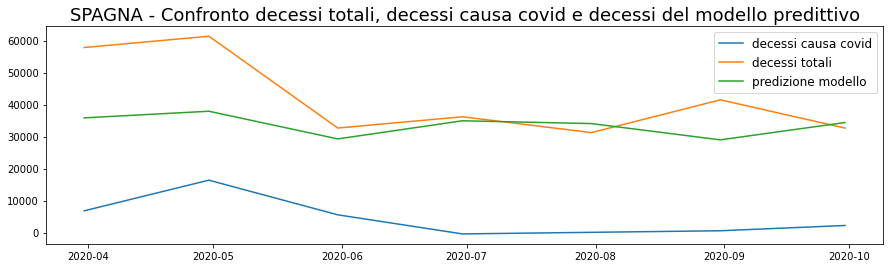

In [25]:
plt.figure(figsize=(15,4))
plt.title('SPAGNA - Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=18)
plt.plot(covid, label='decessi causa covid')
plt.plot(decessi_tot, label='decessi totali')
plt.plot(predictions, label='predizione modello')
plt.legend(prop={'size': 12})
plt.show()

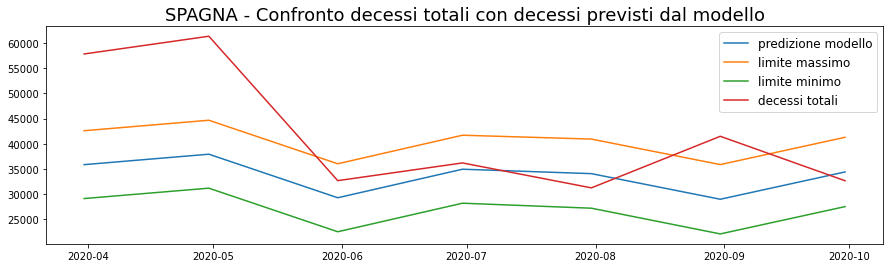

In [26]:
plt.figure(figsize=(15,4))
plt.title("SPAGNA - Confronto decessi totali con decessi previsti dal modello", size=18)
plt.plot(predictions, label='predizione modello')
plt.plot(upper, label='limite massimo')
plt.plot(lower, label='limite minimo')
plt.plot(decessi_tot, label='decessi totali')
plt.legend(prop={'size': 12})
plt.show()

<h3>Calcolo dei decessi COVID-19 secondo il modello predittivo</h3>

Differenza tra i decessi totali e i decessi secondo la previsione del modello SARIMA.

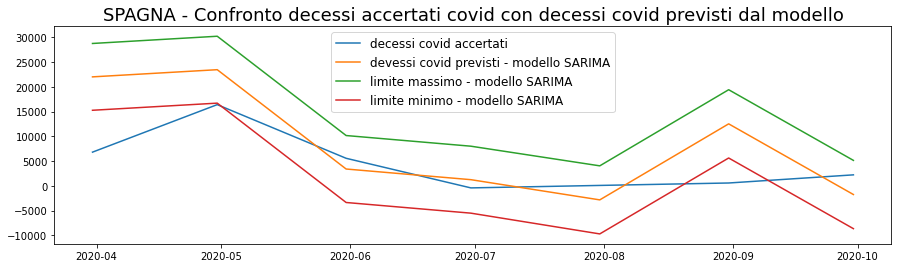

In [27]:
n = decessi_tot - predictions
n_upper = decessi_tot - lower
n_lower = decessi_tot - upper

plt.figure(figsize=(15,4))
plt.title("SPAGNA - Confronto decessi accertati covid con decessi covid previsti dal modello", size=18)
plt.plot(covid, label='decessi covid accertati')
plt.plot(n, label='devessi covid previsti - modello SARIMA')
plt.plot(n_upper, label='limite massimo - modello SARIMA')
plt.plot(n_lower, label='limite minimo - modello SARIMA')
plt.legend(prop={'size': 12})
plt.show()

Gli <b>intervalli</b> corrispondono alla differenza tra i decessi totali per i mesi di marzo, aprile, maggio, giugno, luglio e settembre 2020 e i valori degli <b>intervalli di confidenza</b> (intervallo superiore e intervallo inferiore) del modello predittivo SARIMA dei medesimi mesi.

<h3>Numero totale dei decessi accertati COVID-19 registrati in Spagna</h3>

In [28]:
m = covid.sum()
print(int(m))

31232


<h3>Numero totale dei decessi COVID-19 previsti dal modello per la Spagna</h3>

<h4>Valore medio

In [29]:
total = n.sum()
print(int(total))

58007


<h4>Valore massimo

In [30]:
total_upper = n_upper.sum()
print(int(total_upper))

105637


<h4>Valore minimo

In [31]:
total_lower = n_lower.sum()
print(int(total_lower))

10378


<h3>Calcolo del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA in Spagna</h3>

<h4>Valore medio

In [32]:
x = decessi_tot - predictions - covid
x = x.sum()
print(int(x))

26775


<h4>Valore massimo

In [33]:
x_upper = decessi_tot - lower - covid
x_upper = x_upper.sum()
print(int(x_upper))

74405


<h4>Valore minimo

In [34]:
x_lower = decessi_tot - upper - covid
x_lower = x_lower.sum()
print(int(x_lower))

-20853
